# K-Means Baseline

Using K-means as a baseline approach to compare all future models against. This approach uses only the crash data and ignores all the auxillary data (i.e. road segement, weather, and Uber speed data). Thus any model that takes advantage of the additional data should perform at least better than this one to be considered useful.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import importlib

import Support as Sup
import Clustering as Cl
import Optimization as Opt
import PreProcessing as Proc
import FeatureSelection as FS

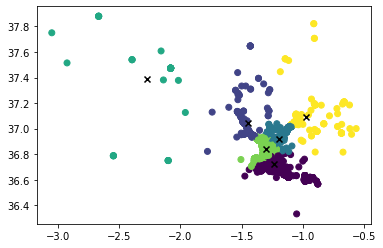

Sum of distance with K-Mean: 2485.099661859956


In [2]:
kmeans = Cl.Kmeans(plot = 1)
crashes = Sup.Load_Crash_Data()
crash_locations = np.delete(crashes, 0, 1).astype(float)
kmeans.Train(crash_locations, crashes)
performance = Sup.Competition_Metric([kmeans.centers], crashes, time_dep =0)
print("Sum of distance with K-Mean: " + str(performance))
crash_locations[:, [1, 0]] = crash_locations[:, [0, 1]]

<AxesSubplot:>

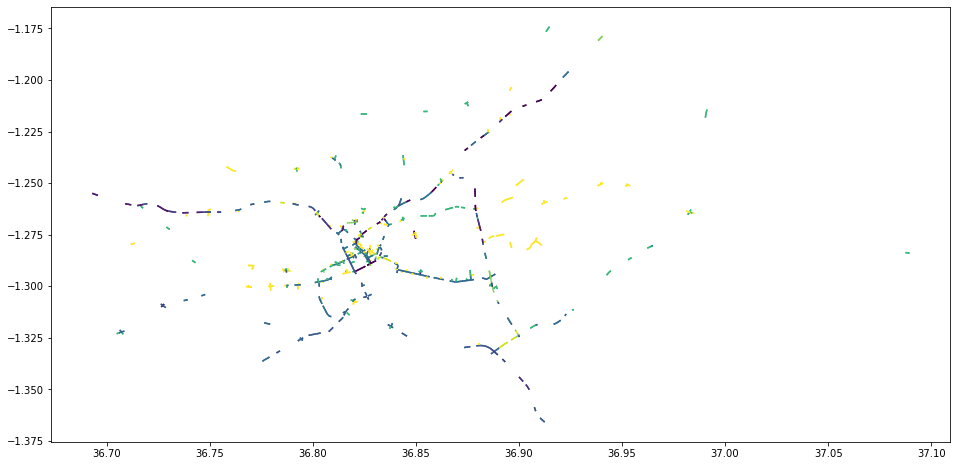

In [3]:
segments_merged = Sup.Load_Merge_Road()
segments_merged = Proc.Merge_Roads_Crashes(segments_merged, crash_locations, crashes)
segments_merged.plot(column='55_90', figsize=(20, 8))

In [4]:
weather = pd.read_csv('Data/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])
weather.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [86]:
#importlib.reload(FS)
predictive_data, crash_labels = Proc.Create_Time_Series_Data(segments_merged, weather)
trimmed = FS.Nan_Threshold(predictive_data, .4)

In [103]:
from sklearn import feature_selection
sel = feature_selection.VarianceThreshold()
sel.fit_transform(trimmed)

array([[2.41000004e+01, 7.27000046e+01, 9.56000015e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.73622875e+01, 7.49000015e+01, 1.04625244e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02466183e+01, 8.65999985e+01, 1.19300000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.16000004e+01, 8.93000031e+01, 1.21299997e-02, ...,
                   nan,            nan,            nan],
       [1.65000000e+01, 8.50000000e+01, 1.09738912e-02, ...,
                   nan,            nan,            nan],
       [1.59000006e+01, 8.45000000e+01, 1.08599998e-02, ...,
                   nan,            nan,            nan]])

In [ ]:
#correlation_matrix = segments_merged.iloc[:,3:].corr().abs()
#print(correlation_matrix['target'].sort_values(ascending=False).head())

In [112]:
trimmed_20 = FS.Top_Variance_Select(trimmed, 20)

In [114]:
trimmed_20.shape

(1122085, 20)